# DATA GATHERING AND CLEANING 

The data for our analysis comes from 5 different datasets, our first activity was to clean all of them and structure them in a single useful dataset with all the needed fields for further analysis.

1. All of our data was extracted from kaggle, data can be found in the following links:
2. Horse Racing in Hong Kong - https://www.kaggle.com/gdaley/hkracing  
3. Hong Kong Horse Racing Results 2014-2017 -https://www.kaggle.com/lantanacamara/hong-kong-horse-racing  

Our raw data consist of the following files:

### 1st set of data:
- race_hk_1.csv - each row represents a race, data can be merged without problem with race_id.
- race_horse_hk_1.csv - each row represents a horse in a race, data can be merged using race_id.

### 2nd set of data:
- race_hk_2.csv - each row represents a race, data can be merged without problem with race_id
- race_horse_hk_2.csv - each row represents a horse in a race, data can be merged using race_id.



In [1]:
#import 
import pandas as pd
import datetime
import scipy.stats as sts
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
race_hk1_org = pd.read_csv("datasets/races.csv")
race_horse_hk1_org = pd.read_csv("datasets/runs.csv")
race_hk2_org = pd.read_csv("datasets/race-result-race.csv")
race_horse_hk2_org = pd.read_csv("datasets/race-result-horse.csv")

In [3]:
race_hk1 = race_hk1_org[[
            "race_id", "date", "race_no", "config", "surface", "distance", "going", "horse_ratings",
            "prize", "race_class", 

            ]]

race_hk2 = race_hk2_org[["race_date", "race_course", "race_number", "race_id", "race_class", 
                         "track_condition", "race_name", "track"
                        ]]
    

race_horse_hk1 = race_horse_hk1_org[[
             "race_id", "horse_no", "horse_id", "result", "won", "lengths_behind", "horse_age", 
             "horse_country", "horse_type", "horse_rating", "horse_gear", "declared_weight", "actual_weight",
             "draw", "finish_time", "win_odds", "place_odds"
             ]]

race_horse_hk2 = race_horse_hk2_org[["horse_number", "horse_name", "horse_id", "jockey", "trainer", 
                                     "race_id"
                      ]]


In [4]:
races_merged_hk1 = pd.merge(race_hk1, race_horse_hk1, on="race_id")
races_merged_hk2 = pd.merge(race_hk2, race_horse_hk2, on="race_id")

print(races_merged_hk1.count())
print(races_merged_hk2.count())

race_id            79447
date               79447
race_no            79447
config             79447
surface            79447
distance           79447
going              79447
horse_ratings      79447
prize              73598
race_class         79447
horse_no           79447
horse_id           79447
result             79447
won                79447
lengths_behind     79447
horse_age          79447
horse_country      79445
horse_type         79445
horse_rating       79447
horse_gear         79447
declared_weight    79447
actual_weight      79447
draw               79447
finish_time        79447
win_odds           79447
place_odds         75712
dtype: int64
race_date          30189
race_course        30189
race_number        30189
race_id            30189
race_class         30189
track_condition    30189
race_name          30189
track              30189
horse_number       29851
horse_name         30189
horse_id           30189
jockey             30189
trainer            30189
dtype: int64

In [5]:
races_merged_hk2 = races_merged_hk2.dropna(subset=['horse_number'])

In [6]:
print(len(races_merged_hk1[["race_id", "race_no", "horse_no"]].drop_duplicates()))
print(len(races_merged_hk2[["race_id", "race_number", "horse_number"]].drop_duplicates()))


print(races_merged_hk2.count())
print(len(races_merged_hk2[["race_id", "race_number", "horse_number"]].drop_duplicates()))

races_merged_hk1["date"] = pd.to_datetime(races_merged_hk1["date"]) + pd.to_timedelta('4123 days')
races_merged_hk2["horse_number"] = races_merged_hk2["horse_number"].astype(int)
races_merged_hk2["race_date"] = pd.to_datetime(races_merged_hk2["race_date"])

79447
29851
race_date          29851
race_course        29851
race_number        29851
race_id            29851
race_class         29851
track_condition    29851
race_name          29851
track              29851
horse_number       29851
horse_name         29851
horse_id           29851
jockey             29851
trainer            29851
dtype: int64
29851


In [7]:
print(races_merged_hk1.count())
print(races_merged_hk2.count())
print(races_merged_hk1[["race_no", "horse_no", "distance", "actual_weight", "date"]].dtypes)
print(races_merged_hk2[["race_number", "horse_number", "race_date"]].dtypes)


race_id            79447
date               79447
race_no            79447
config             79447
surface            79447
distance           79447
going              79447
horse_ratings      79447
prize              73598
race_class         79447
horse_no           79447
horse_id           79447
result             79447
won                79447
lengths_behind     79447
horse_age          79447
horse_country      79445
horse_type         79445
horse_rating       79447
horse_gear         79447
declared_weight    79447
actual_weight      79447
draw               79447
finish_time        79447
win_odds           79447
place_odds         75712
dtype: int64
race_date          29851
race_course        29851
race_number        29851
race_id            29851
race_class         29851
track_condition    29851
race_name          29851
track              29851
horse_number       29851
horse_name         29851
horse_id           29851
jockey             29851
trainer            29851
dtype: int64

In [8]:
final_df = pd.merge(races_merged_hk1, races_merged_hk2, how="inner", left_on = ["race_no", "horse_no", "date"],
                   right_on = ["race_number", "horse_number", "race_date"])

final_df.count()

final_df.to_csv("final.csv")

In [9]:
print(final_df.count())
print(len(final_df[["race_id_x", "race_no", "horse_no"]].drop_duplicates()))

race_id_x          22544
date               22544
race_no            22544
config             22544
surface            22544
distance           22544
going              22544
horse_ratings      22544
prize              22544
race_class_x       22544
horse_no           22544
horse_id_x         22544
result             22544
won                22544
lengths_behind     22544
horse_age          22544
horse_country      22544
horse_type         22544
horse_rating       22544
horse_gear         22544
declared_weight    22544
actual_weight      22544
draw               22544
finish_time        22544
win_odds           22544
place_odds         18928
race_date          22544
race_course        22544
race_number        22544
race_id_y          22544
race_class_y       22544
track_condition    22544
race_name          22544
track              22544
horse_number       22544
horse_name         22544
horse_id_y         22544
jockey             22544
trainer            22544
dtype: int64
22544


In [10]:
final_df.columns

Index(['race_id_x', 'date', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class_x', 'horse_no',
       'horse_id_x', 'result', 'won', 'lengths_behind', 'horse_age',
       'horse_country', 'horse_type', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'finish_time', 'win_odds',
       'place_odds', 'race_date', 'race_course', 'race_number', 'race_id_y',
       'race_class_y', 'track_condition', 'race_name', 'track', 'horse_number',
       'horse_name', 'horse_id_y', 'jockey', 'trainer'],
      dtype='object')

In [60]:
final_df=final_df.rename(columns={"race_id_x":"Race_id",
                                 "date":"Date",
                                 "race_no":"Race_no",
                                 "distance":"Distance",
                                 "going":"Surface_condition",
                                 "prize":"Prize",
                                 "horse_no":"Horse_no",
                                 "horse_id_y":"Horse_id",
                                 "result":"Final_position",
                                 "won":"Won",
                                 "horse_age":"Horse_age",
                                 "horse_country":"Horse_country",
                                 "horse_type":"Horse_type",
                                 "actual_weight":"Actual_weight",
                                 "finish_time":"Finish_time",
                                 "race_course":"Course",
                                 "race_class_x":"Class",                                
                                 "race_name":"Race_name",
                                 "track":"Track",
                                 "horse_name":"Horse_name",
                                 "jockey":"Jockey",
                                 "trainer":"Trainer",
                                 "declared_weight":"Declared_weight",
                                 })

In [61]:
final_df.columns


Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'Class', 'Horse_no',
       'horse_id_x', 'Final_position', 'Won', 'lengths_behind', 'Horse_age',
       'Horse_country', 'Horse_type', 'horse_rating', 'horse_gear',
       'Declared_weight', 'Actual_weight', 'draw', 'Finish_time', 'win_odds',
       'place_odds', 'race_date', 'Course', 'race_number', 'race_id_y',
       'race_class_y', 'track_condition', 'Race_name', 'Track', 'horse_number',
       'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

TERMINA LIMPIEZA DE INFORMACION
--------------------------------------------------------

# EXPLORACION DE DATOS


### MARTIN WORK

In [62]:
ctry=round(pd.DataFrame(final_df.groupby("Horse_country")["Won"].mean())*100,2)
ctry=ctry.rename(columns={"Won":"Win Rate","Horse_country":"Country"})
ctry["# of Horses"]=final_df.groupby("Horse_country")["Horse_id"].count()
ctry=ctry.sort_values(by="Win Rate",ascending=False)
saf=final_df.query("Horse_country=='SAF'")
safmode=saf["Actual_weight"].mode()
ctry



,Win Rate,# of Horses
Horse_country,,
SAF,9.01,222
AUS,8.58,8657
JPN,8.47,59
NZ,8.32,6872
USA,7.73,686
GB,7.59,2054
IRE,6.87,3190
ARG,5.88,17
ITY,5.26,57


In [63]:
rr=final_df.drop_duplicates("Horse_id")
r40=rr.query("horse_rating<40")
r60=rr.query("horse_rating>40 and horse_rating<=60")
r80=rr.query("horse_rating>60 and horse_rating<=80")
r100=rr.query("horse_rating>80 and horse_rating<=100")

The r-squared is: 0.9724864657291215


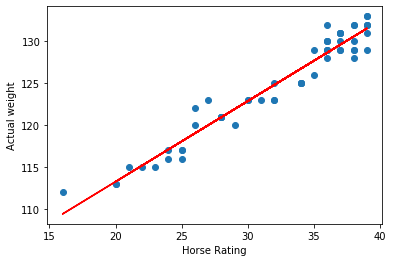

In [64]:
#HACER FUNCION

x_values = r40["horse_rating"]
y_values = r40["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()



The r-squared is: 0.14646500938136114


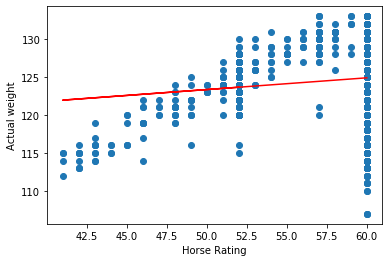

In [65]:
x_values = r60["horse_rating"]
y_values = r60["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47.5,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.8622084992506608


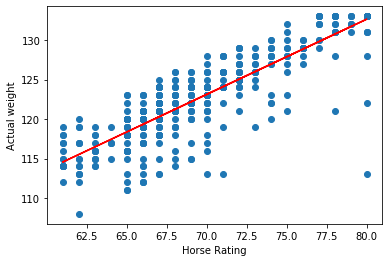

In [66]:
x_values = r80["horse_rating"]
y_values = r80["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(67,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()



The r-squared is: 0.253455815654013


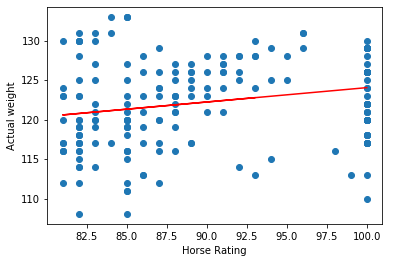

In [67]:
x_values = r100["horse_rating"]
y_values = r100["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(92.5,103),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()



In [68]:
final_df.columns

Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'Class', 'Horse_no',
       'horse_id_x', 'Final_position', 'Won', 'lengths_behind', 'Horse_age',
       'Horse_country', 'Horse_type', 'horse_rating', 'horse_gear',
       'Declared_weight', 'Actual_weight', 'draw', 'Finish_time', 'win_odds',
       'place_odds', 'race_date', 'Course', 'race_number', 'race_id_y',
       'race_class_y', 'track_condition', 'Race_name', 'Track', 'horse_number',
       'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

In [69]:
rating=final_df
bins=[0,40,60,80,150]
labels=["0-40","41-60","61-80","81-130"]
ratings=pd.DataFrame(pd.cut(rating["horse_rating"],bins=bins,labels=labels).value_counts())
#ratings['Rate of Won races']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
ratings['Declared weight mean (lb)']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Declared_weight':'mean'}),2)
ratings['Actual weight mode (lb)']=[129,125,120,126]
ratings['Prize $']=rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Prize':'mean'})
ratings['Prize $']=ratings['Prize $'].apply(lambda x: '%.0f' % x)
ratings=ratings.sort_index()
ratings=ratings.rename(columns={"horse_rating":"Number of Horses"})
ratings

,Number of Horses,Declared weight mean (lb),Actual weight mode (lb),Prize $
0-40,2640,1091.21,126,606405
41-60,10116,1107.12,129,897403
61-80,6477,1111.82,125,1145580
81-130,3311,1122.49,120,3272810


In [70]:
ratctry=list()
threetop=["SAF","AUS","JPN"]
for country in threetop:
    ct=final_df.query(f"Horse_country=='{country}'")
    rtct=pd.DataFrame(pd.cut(ct["horse_rating"],bins=bins,labels=labels).value_counts())
    rtct['Rate of Won races']=round(ct.groupby(pd.cut(ct["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
    rtct['Country']=country
    ratctry.append(rtct)    
ratctry[0]=ratctry[0].sort_values("Rate of Won races",ascending=False)
ratctry[1]=ratctry[1].sort_values("Rate of Won races",ascending=False)
ratctry[2]=ratctry[2].sort_values("Rate of Won races",ascending=False)
del ratctry[0]["horse_rating"],ratctry[1]["horse_rating"],ratctry[2]["horse_rating"]
ratctry[0]=ratctry[0].reset_index()
ratctry[1]=ratctry[1].reset_index()
ratctry[2]=ratctry[2].reset_index()
saf=ratctry[0].query("index=='81-130' or index=='41-60'")
aus=ratctry[1].query("index=='81-130' or index=='61-80'")
jpn=ratctry[2].query("index=='81-130'")
saf=saf.append(aus)
saf=saf.append(jpn)
saf=saf.sort_values("Rate of Won races",ascending=False).reset_index()
del saf["level_0"]
saf=saf.rename(columns={"index":"Horse Rating"})

In [71]:
jpn=final_df.query("Horse_country=='JPN' or horse_rating=='81-130'")
saf1=final_df.query("Horse_country=='SAF' or horse_rating=='81-130'")
saf2=final_df.query("Horse_country=='SAF' or horse_rating=='41-60'")
aus1=final_df.query("Horse_country=='AUS' or horse_rating=='81-130'")
aus2=final_df.query("Horse_country=='JPN' or horse_rating=='61-80'")

jpnmode=jpn["Actual_weight"].mode()
jpnmean=round(jpn["Declared_weight"].mean(),2)

safmode=saf1["Actual_weight"].mode()
safmean=round(saf1["Declared_weight"].mean(),2)

saf1mode=saf2["Actual_weight"].mode()
saf1mean=round(saf2["Declared_weight"].mean(),2)

ausmode=aus1["Actual_weight"].mode()
ausmean=round(aus1["Declared_weight"].mean(),2)

aus1mode=aus2["Actual_weight"].mode()
aus1mean=round(aus2["Declared_weight"].mean(),2)

mode=[126,119,119,133,126]
mean=[jpnmean,safmean,saf1mean,ausmean,aus1mean]
saf["Actual weight mode (lb)"]=mode
saf["Declared weight mean (lb)"]=mean
saf

,Horse Rating,Rate of Won races,Country,Actual weight mode (lb),Declared weight mean (lb)
0,81-130,17.86,JPN,126,1055.07
1,81-130,16.67,SAF,119,1089.87
2,41-60,10.53,SAF,119,1089.87
3,81-130,9.90,AUS,133,1117.61
4,61-80,9.65,AUS,126,1055.07


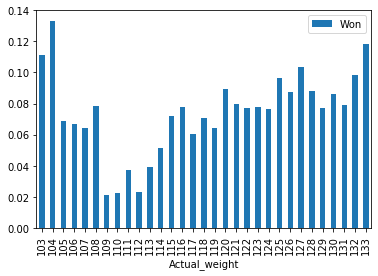

In [72]:
P=pd.DataFrame(final_df.groupby('Actual_weight')['Won'].mean())
P.plot.bar()
plt.show()

In [73]:
gelding=final_df.query("Horse_type=='Gelding'")
mare=final_df.query("Horse_type=='Mare'")
horse=final_df.query("Horse_type=='Horse'")
brown=final_df.query("Horse_type=='Brown'")
rig=final_df.query("Horse_type=='rig'")
colt=final_df.query("Horse_type=='Colt'")
roan=final_df.query("Horse_type=='Roan'")

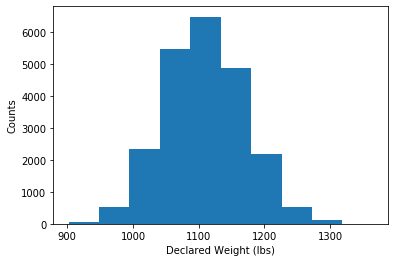

NormaltestResult(statistic=56.9399069410686, pvalue=4.3217168331487684e-13)
The variance is: 3680.6628462305125


In [74]:
import scipy.stats as sts
plt.hist(final_df["Declared_weight"])
plt.xlabel('Declared Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final_df["Declared_weight"]))
var=np.var(final_df["Declared_weight"])
std=np.std(final_df["Declared_weight"])
mean=np.mean(final_df["Declared_weight"])
median=np.median(final_df["Declared_weight"])
mode=sts.mode(final_df["Declared_weight"])
print(f"The variance is: {var}")

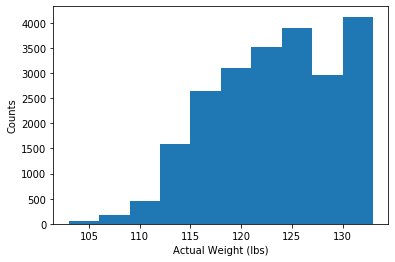

NormaltestResult(statistic=1402.8618908307797, pvalue=2.35727890579134e-305)
The variance is: 39.31338828538831


In [75]:
plt.hist(final_df["Actual_weight"])
plt.xlabel('Actual Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final_df["Actual_weight"]))
var=np.var(final_df["Actual_weight"])
std=np.std(final_df["Actual_weight"])
mean=np.mean(final_df["Actual_weight"])
median=np.median(final_df["Actual_weight"])
mode=sts.mode(final_df["Actual_weight"])
print(f"The variance is: {var}")

# MARIO WORK

In [76]:
def plotHistogramSize(df, ylabel, xlabel, title, xSize, ySize, color):
    graph = df.plot(kind="bar", figsize=(xSize,ySize), color=color)
    graph.set_ylabel = ylabel
    graph.set_xlabel = xlabel
    graph.set_title(title)

In [103]:
dist_df = final_df[["Race_id", "Date", "Course", "Race_no", "config", 
                    "surface", "Distance", "Surface_condition","Prize","Class",
                    "Track", "Race_name", "track_condition", "race_class_y"
                   ]].drop_duplicates()

In [79]:
# number of races to analyze
dist_df.count()
len(dist_df["Race_id"].drop_duplicates())

1801

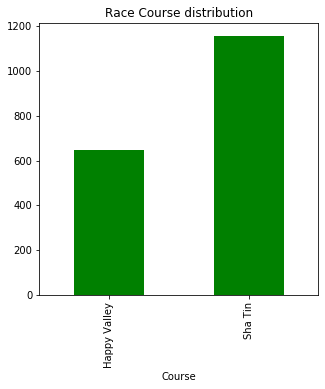

In [82]:
group_track = dist_df.groupby("Course").size()
plotHistogramSize (group_track, "Number of races", "Course", "Race Course distribution", 5,5,"g")


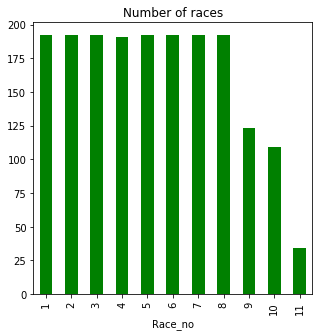

In [85]:
group_race = dist_df.groupby("Race_no").size()
plotHistogramSize (group_race, "Number of races", "Race_no", "Number of races", 5,5,"g")

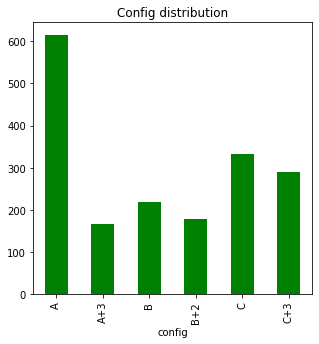

In [86]:
group_config = dist_df.groupby("config").size()
plotHistogramSize (group_config, "Number of races", "Config", "Config distribution", 5,5,"g")

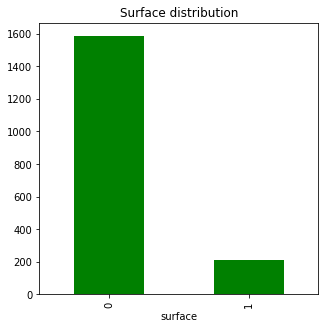

In [87]:
group_surface= dist_df.groupby("surface").size()
plotHistogramSize (group_surface, "Number of races", "surface", "Surface distribution", 5,5,"g")

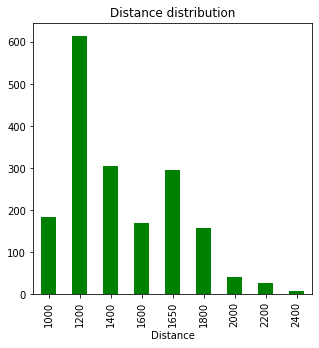

In [89]:
group_distance = dist_df.groupby("Distance").size()
plotHistogramSize (group_distance, "Number of races", "Distance", "Distance distribution", 5,5,"g")


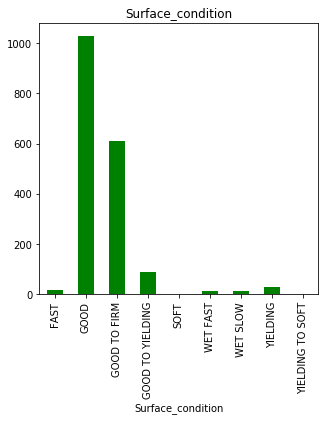

In [91]:
group_going = dist_df.groupby("Surface_condition").size()
plotHistogramSize (group_going, "Number of races", "going", "Surface_condition", 5,5,"g")

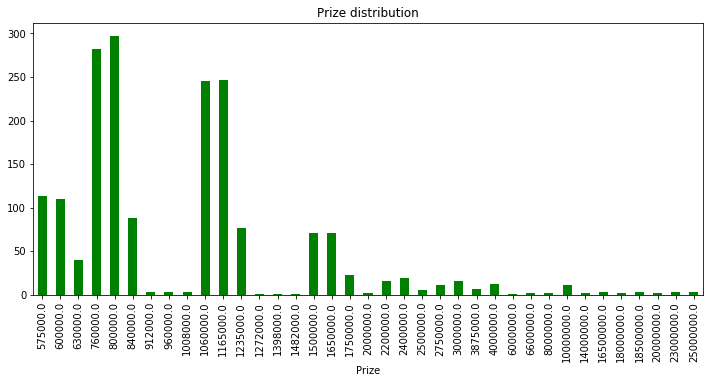

In [93]:
group_prize = dist_df.groupby("Prize").size()
plotHistogramSize (group_prize, "Number of races", "prize", "Prize distribution", 12,5,"g")

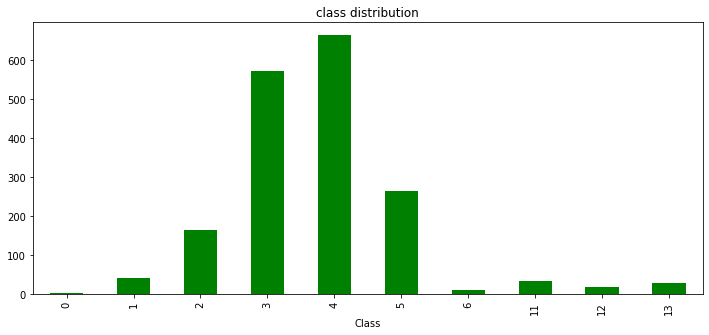

In [97]:
group_class = dist_df.groupby("Class").size()
plotHistogramSize (group_class, "Number of races", "Class", "class distribution", 12,5,"g")

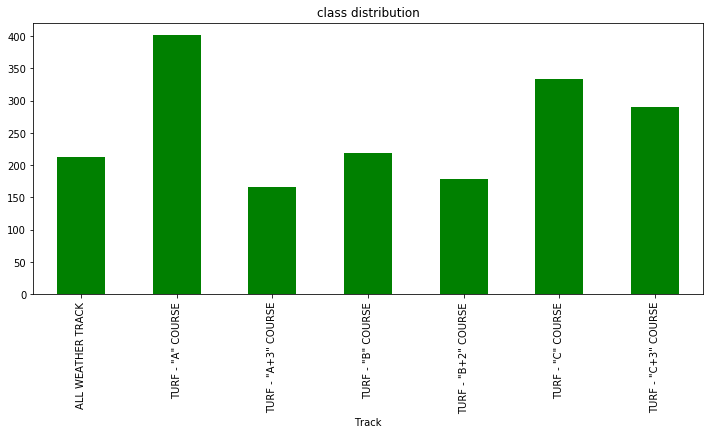

In [100]:
group_track = dist_df.groupby("Track").size()
plotHistogramSize (group_track, "Number of races", "Track", "class distribution", 12,5,"g")

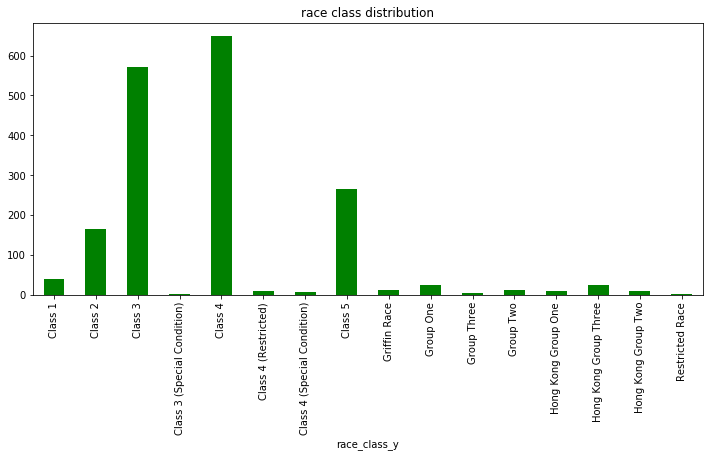

In [104]:
group_class = dist_df.groupby("race_class_y").size()
plotHistogramSize (group_class, "Number of races", "race class", "race class distribution", 12,5,"g")



In [106]:
final_df["speed_mseg"] = final_df["Distance"]  / final_df["Finish_time"]

In [112]:
# Generate a scatter 
#filtered_df = final_df.loc[final_df["Class"] == 5]
filtered_df = final_df
df = filtered_df.groupby(["Actual_weight"])["speed_mseg"].mean()
df = df.reset_index()
df

,Actual_weight,speed_mseg
0,103,16.620395
1,104,16.768084
2,105,16.791367
3,106,16.788907
4,107,16.786250
5,108,16.803952
6,109,16.806557
7,110,16.838206
8,111,16.725149
9,112,16.759844


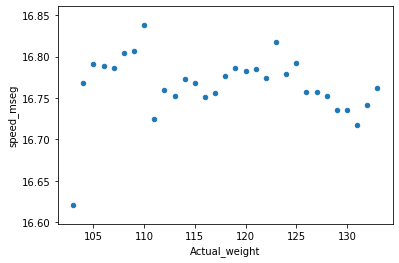

In [111]:
df.plot(kind="scatter", x="Actual_weight", y="speed_mseg")

In [114]:
# Generate a scatter 
df = final_df.groupby(["Declared_weight"])["speed_mseg"].mean()
df = df.reset_index()
df

,Declared_weight,speed_mseg
0,902.0,16.556291
1,905.0,16.248154
2,914.0,16.453382
3,915.0,16.168149
4,916.0,16.375234
...,...,...
385,1313.0,17.035775
386,1315.0,17.424132
387,1318.0,16.692500
388,1326.0,15.989340


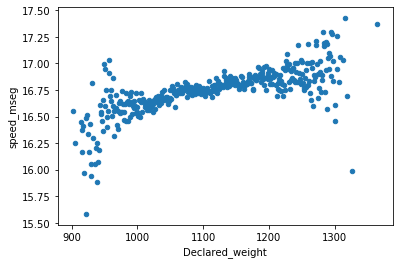

In [116]:
df.plot(kind="scatter", x="Declared_weight", y="speed_mseg")

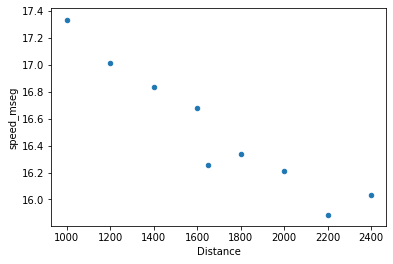

In [118]:
df = final_df.groupby(["Distance"])["speed_mseg"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="Distance", y="speed_mseg")


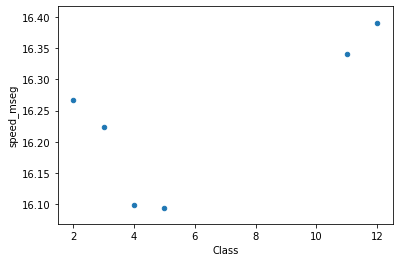

In [120]:
filtered_df = final_df.loc[final_df["Distance"] == 2000]
df = filtered_df.groupby(["Class"])["speed_mseg"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="Class", y="speed_mseg")



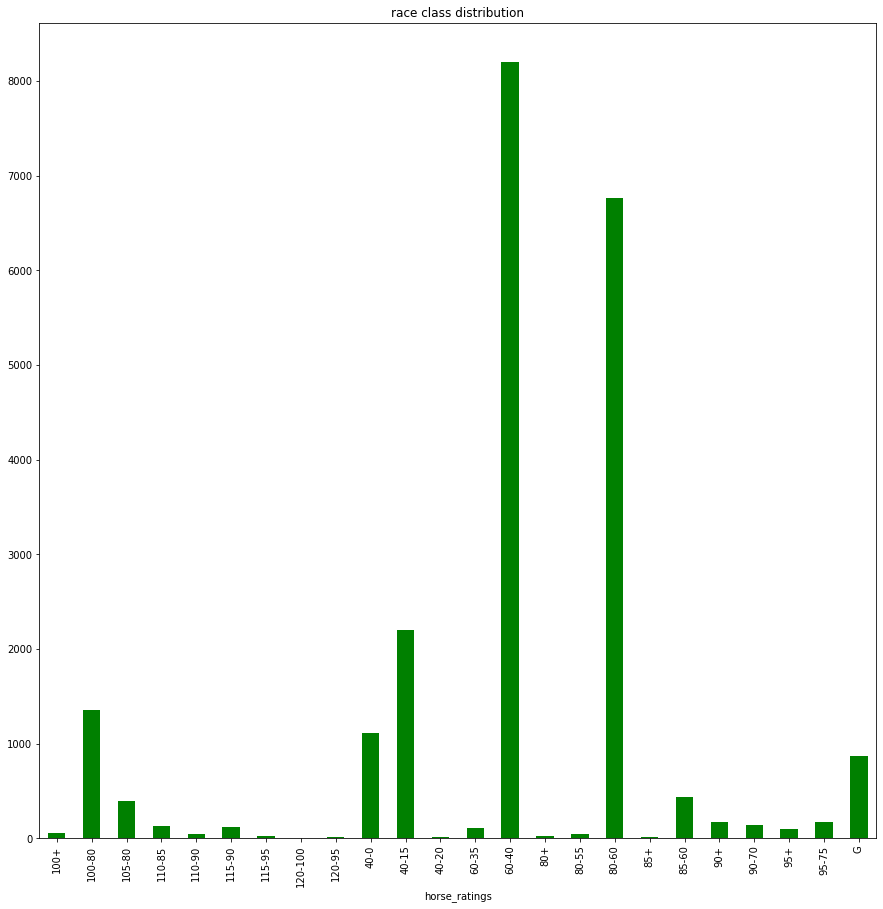

In [127]:
group_class = final_df.groupby("horse_ratings")["Horse_id"].count()
plotHistogramSize (group_class, "Number of races", "race class", "race class distribution", 15,15,"g")


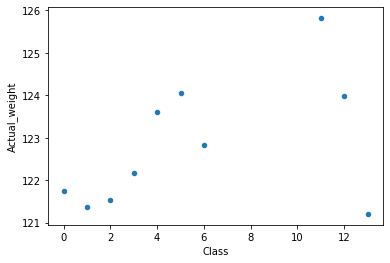

In [128]:
df = final_df.groupby(["Class"])["Actual_weight"].mean()
df = df.reset_index()

df.plot(kind="scatter", x="Class", y="Actual_weight")

# JORGE WORK

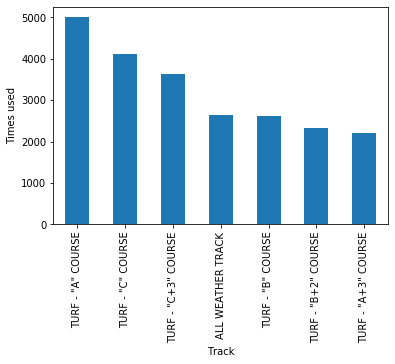

In [30]:
# Type of Track
track_type = final_df["Track"]
track_type.value_counts().plot(kind  = "bar")
plt.xlabel("Track")
plt.ylabel("Times used")
plt.show()

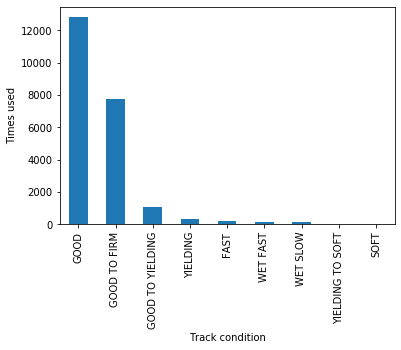

In [31]:
# Track condition 
track_condition = final_df["Surface_condition"]
track_condition.value_counts().plot(kind = "bar")
plt.xlabel("Track condition")
plt.ylabel("Times used")
plt.show()

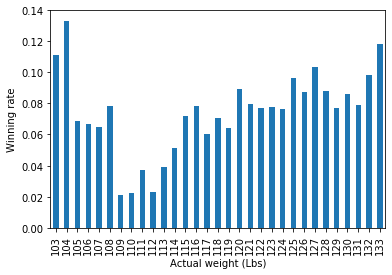

In [32]:
# Checking if weight has something ot do with winning
weight = final_df.groupby("Actual_weight")["Won"].mean()
weight.plot.bar()
plt.xlabel("Actual weight (Lbs)")
plt.ylabel("Winning rate")
plt.show()

In [33]:
# Looking up the horses that have won the most
winnings = final_df.query("Won == 1")
horses_win = winnings["Horse_name"].value_counts()
horses_win.head()


CONTENTMENT      9
BEAUTY ONLY      7
LUCKY YEAR       7
SUN JEWELLERY    7
ABLE FRIEND      7
Name: Horse_name, dtype: int64

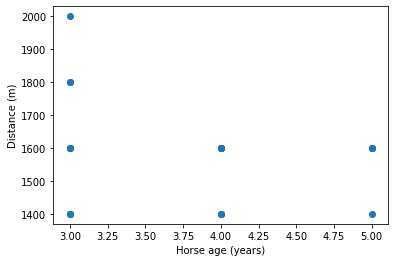

In [35]:
#Finding all data for the most profitable horse in the racing history
horse_1 = final_df[final_df["Horse_name"] == "CONTENTMENT"]

# Distance ran by the horse
plt.scatter(horse_1["Horse_age"], horse_1["Distance"])
plt.xlabel("Horse age (years)")
plt.ylabel("Distance (m)")
plt.show()

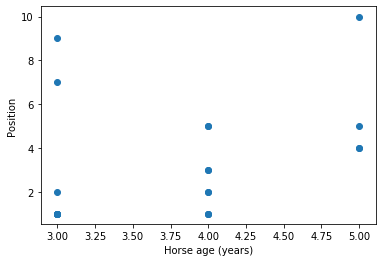

In [36]:
# Horse pposition along its life

plt.scatter(horse_1["Horse_age"], horse_1["Final_position"])
plt.xlabel("Horse age (years)")
plt.ylabel("Position")
plt.show()

The r-squared value is: 0.4745295646600449


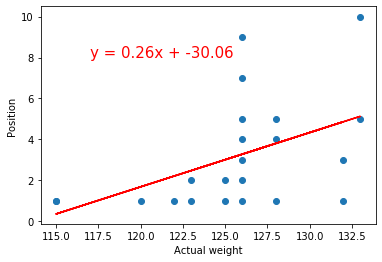

In [37]:
# Final position vs actual weight
plt.scatter(horse_1["Actual_weight"], horse_1["Final_position"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(horse_1["Actual_weight"], horse_1["Final_position"])
regress_values = horse_1["Actual_weight"] * slope + intercept
plt.plot(horse_1["Actual_weight"], regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (117,8), fontsize=15, color="red")

print(f"The r-squared value is: {rvalue}")
plt.xlabel("Actual weight")
plt.ylabel("Position")
plt.show()

The r-squared value is: 0.10641544461869006


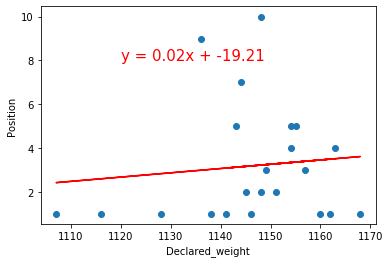

In [38]:
# Final position vs declared weight
plt.scatter(horse_1["Declared_weight"], horse_1["Final_position"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(horse_1["Declared_weight"], horse_1["Final_position"])
regress_values = horse_1["Declared_weight"] * slope + intercept
plt.plot(horse_1["Declared_weight"], regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (1120,8), fontsize=15, color="red")

print(f"The r-squared value is: {rvalue}")
plt.xlabel("Declared_weight")
plt.ylabel("Position")
plt.show()

The r-squared value is: 0.33357127422364047


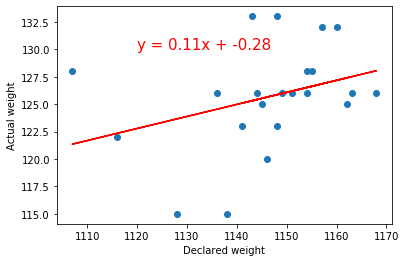

In [39]:
# Actual weight vs declared weight
plt.scatter(horse_1["Declared_weight"], horse_1["Actual_weight"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(horse_1["Declared_weight"], horse_1["Actual_weight"])
regress_values = horse_1["Declared_weight"] * slope + intercept
plt.plot(horse_1["Declared_weight"], regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (1120,130), fontsize=15, color="red")

print(f"The r-squared value is: {rvalue}")
plt.xlabel("Declared weight")
plt.ylabel("Actual weight")
plt.show()

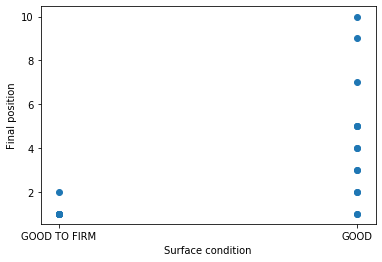

GOOD            14
GOOD TO FIRM     8
Name: Surface_condition, dtype: int64
1     9
5     3
2     3
4     2
3     2
10    1
9     1
7     1
Name: Final_position, dtype: int64


In [40]:
# Plotting the number of times the horse ran in a track with certain consitions
plt.scatter(horse_1["Surface_condition"], horse_1["Final_position"])

plt.xlabel("Surface condition")
plt.ylabel("Final position")
plt.show()

print(horse_1["Surface_condition"].value_counts())
print(horse_1["Final_position"].value_counts())

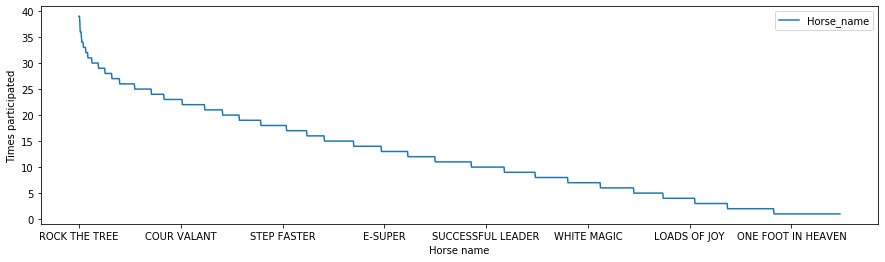

In [41]:
# Most frequent horses
final_df["Horse_name"].value_counts().plot(figsize = (15, 4))
plt.xlabel("Horse name")
plt.ylabel("Times participated")
plt.legend()
plt.show()



In [129]:
# Data frame to find the horses that have participated the most
horse_name_df = final_df["Horse_name"].value_counts()
horse_name_df = pd.DataFrame(horse_name_df).reset_index()
horse_name_df = horse_name_df.rename(columns={"index": "Horse name", "Horse_name": "Participated"})
# Taking only a fixed number of first horses
num = 10
horse_name_df = horse_name_df.query("Participated > 30").head(num)

# Adding new columns to the previous dataframe
horse_name_df["Won"] = ""
horse_name_df["Winning rate (%)"] = ""

# Arrays to store the new data
winning = []
rate = []

for i in range(num):
    # Getting the names of the most frequently participated horses
    name = horse_name_df["Horse name"][i]
    # Getting the data from the original dataframe that corresponds to the selected horse and taking the "Won" column
    name_win_1 = final_df[final_df["Horse_name"] == name]["Won"]
    name_win_2 = final_df[final_df["Horse_name"] == name]["Won"]
    # Getting the number of winnings and losses
    w = name_win_1.value_counts()[1]
    l = name_win_2.value_counts()[0]
    # Assigning them to the arrays
    winning.append(w)
    rate.append(w / (w+l) * 100)

# Adding data to the dataframe
horse_name_df["Won"] = winning
horse_name_df["Winning rate (%)"] = rate

horse_name_df.sort_values("")


,Horse name,Participated,Won,Winning rate (%)
0,ROCK THE TREE,39,2,5.128205
1,ROYAL PARTNER,39,2,5.128205
2,ST YAZIN,38,3,7.894737
3,SAFARI MAGIC,36,1,2.777778
4,INDUSTRIALIST WAY,36,3,8.333333
5,SWEET BEAN,36,4,11.111111
6,HIGH SPEED METRO,35,4,11.428571
7,ROBUST MOMENTUM,34,3,8.823529
8,WIN IT,34,4,11.764706
9,VANILLA,34,3,8.823529


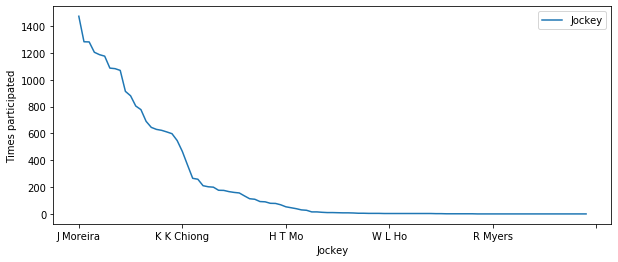

In [43]:
final_df["Jockey"].value_counts().plot(figsize = (10, 4))
plt.xlabel("Jockey")
plt.ylabel("Times participated")
plt.legend()
plt.show()

In [44]:
# Data frame to find the jockeys that have participated the most
jockey_name_df = final_df["Jockey"].value_counts()
jockey_name_df = pd.DataFrame(jockey_name_df).reset_index()
jockey_name_df = jockey_name_df.rename(columns={"index": "Jockey", "Jockey": "Participated"})
# Taking only a fixed number of first jockeys
num = 3
jockey_name_df = jockey_name_df.query("Participated > 30").head(num)

# Adding new columns to the previous dataframe
jockey_name_df["Won"] = ""
jockey_name_df["Winning rate (%)"] = ""

# Arrays to store the new data
winning = []
rate = []

for i in range(num):
    # Getting the names of the most frequently participated jockeys
    name = jockey_name_df["Jockey"][i]
    # Getting the data from the original dataframe that corresponds to the selected jockey and taking the "Won" column
    name_win_1 = final_df[final_df["Jockey"] == name]["Won"]
    name_win_2 = final_df[final_df["Jockey"] == name]["Won"]
    # Getting the number of winnings and losses
    w = name_win_1.value_counts()[1]
    l = name_win_2.value_counts()[0]
    # Assigning them to the arrays
    winning.append(w)
    rate.append(w / (w+l) * 100)

# Adding data to the dataframe
jockey_name_df["Won"] = winning
jockey_name_df["Winning rate (%)"] = rate

jockey_name_df

,Jockey,Participated,Won,Winning rate (%)
0,J Moreira,1472,364,24.728261
1,K Teetan,1282,84,6.552262
2,D Whyte,1281,125,9.758002


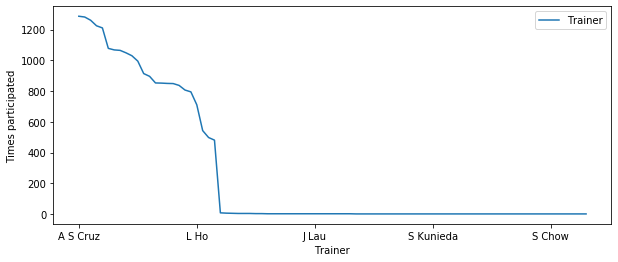

In [45]:
final_df["Trainer"].value_counts().plot(figsize = (10, 4))
plt.xlabel("Trainer")
plt.ylabel("Times participated")
plt.legend()
plt.show()

In [46]:
# Data frame to find the trainers that have trained the most horses
trainer_name_df = final_df["Trainer"].value_counts()
trainer_name_df = pd.DataFrame(trainer_name_df).reset_index()
trainer_name_df = trainer_name_df.rename(columns={"index": "Trainer", "Trainer": "Participated"})
# Taking only a fixed number of first jockeys
num = 3
trainer_name_df = trainer_name_df.query("Participated > 30").head(num)

# Adding new columns to the previous dataframe
trainer_name_df["Won"] = ""
trainer_name_df["Winning rate (%)"] = ""

# Arrays to store the new data
winning = []
rate = []

for i in range(num):
    # Getting the names of the most frequently participated trainers
    name = trainer_name_df["Trainer"][i]
    # Getting the data from the original dataframe that corresponds to the selected trainer and taking the "Won" column
    name_win_1 = final_df[final_df["Trainer"] == name]["Won"]
    name_win_2 = final_df[final_df["Trainer"] == name]["Won"]
    # Getting the number of winnings and losses
    w = name_win_1.value_counts()[1]
    l = name_win_2.value_counts()[0]
    # Assigning them to the arrays
    winning.append(w)
    rate.append(w / (w+l) * 100)

# Adding data to the dataframe
trainer_name_df["Won"] = winning
trainer_name_df["Winning rate (%)"] = rate

trainer_name_df

,Trainer,Participated,Won,Winning rate (%)
0,A S Cruz,1287,113,8.780109
1,C Fownes,1282,116,9.048362
2,C H Yip,1261,75,5.947661
